# Setup

In [1]:
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
from matplotlib import style
import datetime
import seaborn as sns

# Reading Dataset

In [2]:
df = pd.read_csv('../data/Estimated_Number_of_Individuals_with_Drug_Use_Disorder_Year_2016_-_Current_Quarterly_County___Statewide_Health.csv')
df.head()

,Geographic Area,Geographic Name,Gender,Age,Year,Time Period,Drug Use Disorder Estimate,Drug Use Disorder Estimate Description,Drug Use Disorder Estimate Notes,County Code Number,County Code Text,State FIPS Code,County FIPS Code,Latitude,Longitude,Georeferenced Latitude & Longitude
0,State,Commonwealth,All,25 to 34 years,2016,2016 Annual,88562.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
1,State,Commonwealth,All,0 to 14 years,2018,2018 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
2,State,Commonwealth,All,0 to 14 years,2019,2019 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,0,0,42,0,39.346129,-75.167756,POINT (-75.167756 39.346129)
3,County,Union,All,All (12 to 100 years),2016,2016 Annual,NaN,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,60,60,42,119,40.964731,-77.064158,POINT (-77.06415803 40.96473131)
4,County,Northampton,All,All (12 to 100 years),2020,2020 Annual,6159.0,Number of unique individuals estimated to have...,Not displayed when input value is suppressed,48,48,42,95,40.754595,-75.312637,POINT (-75.31263726 40.754595404)


In [3]:
df['Age'].value_counts()

All (12 to 100 years)    350
25 to 34 years             5
0 to 14 years              5
55 to 64 years             5
45 to 54 years             5
15 to 24 years             5
35 to 44 years             5
65+ years                  5
Name: Age, dtype: int64

# Plots

In [4]:
## Removing PA to not count Twice Will have to make a new dataframe as gender is only by state
df1 = df[df['Geographic Area'] != 'County']
df1 = df1[df1['Age'] != 'All (12 to 100 years)']

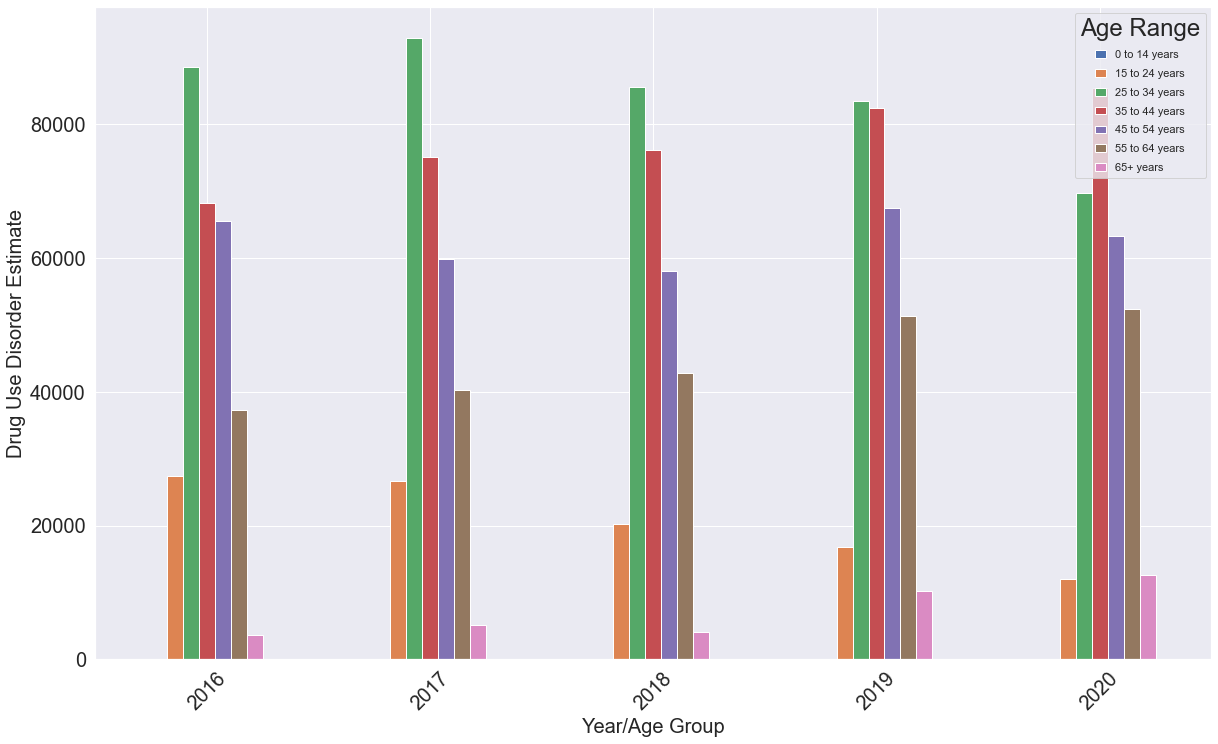

In [9]:
plt.rcParams["figure.figsize"] = (20,12)
sns.set(font_scale = 2)
df1.groupby(['Year', 'Age'])['Drug Use Disorder Estimate'].mean().unstack().plot.bar(fontsize=16)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = 'Year/Age Group', fontsize=20)
plt.ylabel(ylabel = 'Drug Use Disorder Estimate', fontsize=20)
plt.legend(borderpad=.5, labelspacing=.8,handlelength=1,fontsize = 11, title = 'Age Range')
plt.show()

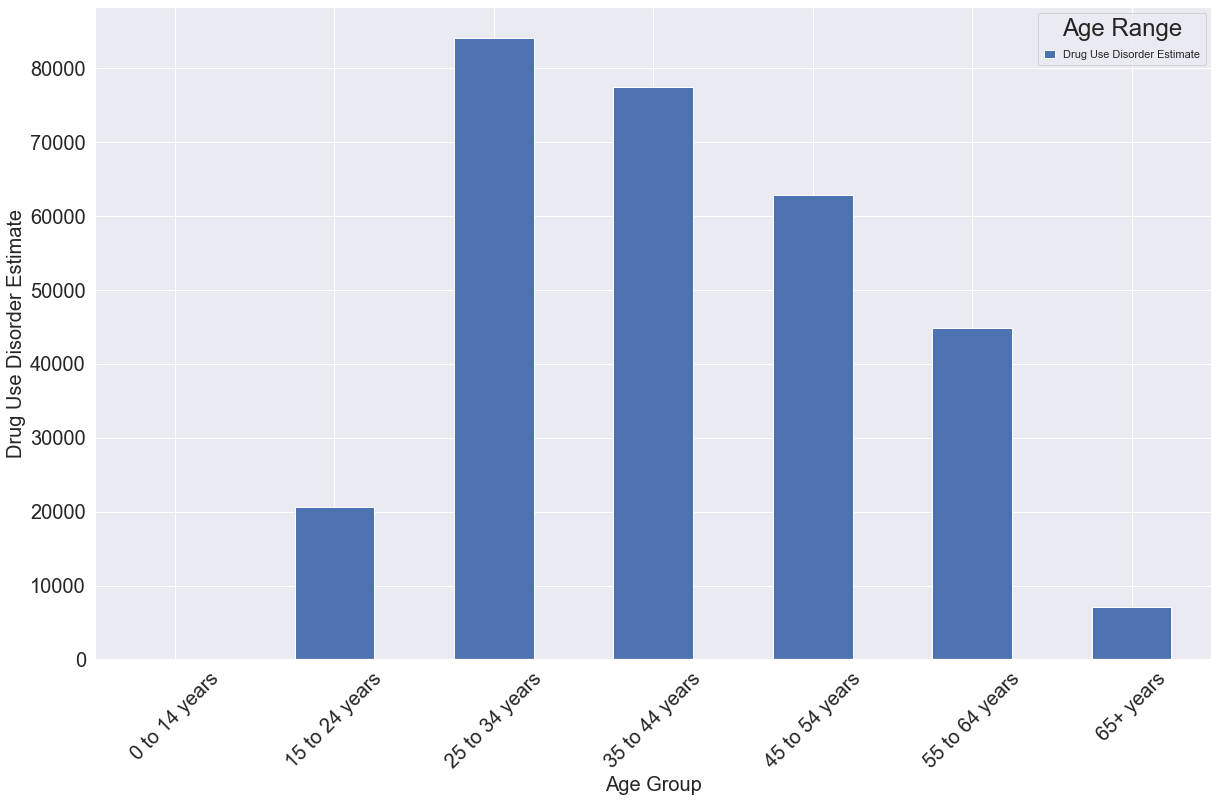

In [6]:
plt.rcParams["figure.figsize"] = (20,12)
sns.set(font_scale = 2)
df1.groupby(['Age'])['Drug Use Disorder Estimate'].mean().plot.bar(fontsize=16)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = 'Age Group', fontsize=20)
plt.ylabel(ylabel = 'Drug Use Disorder Estimate', fontsize=20)
plt.legend(borderpad=.5, labelspacing=.8,handlelength=1,fontsize = 11, title = 'Age Range')
plt.show()

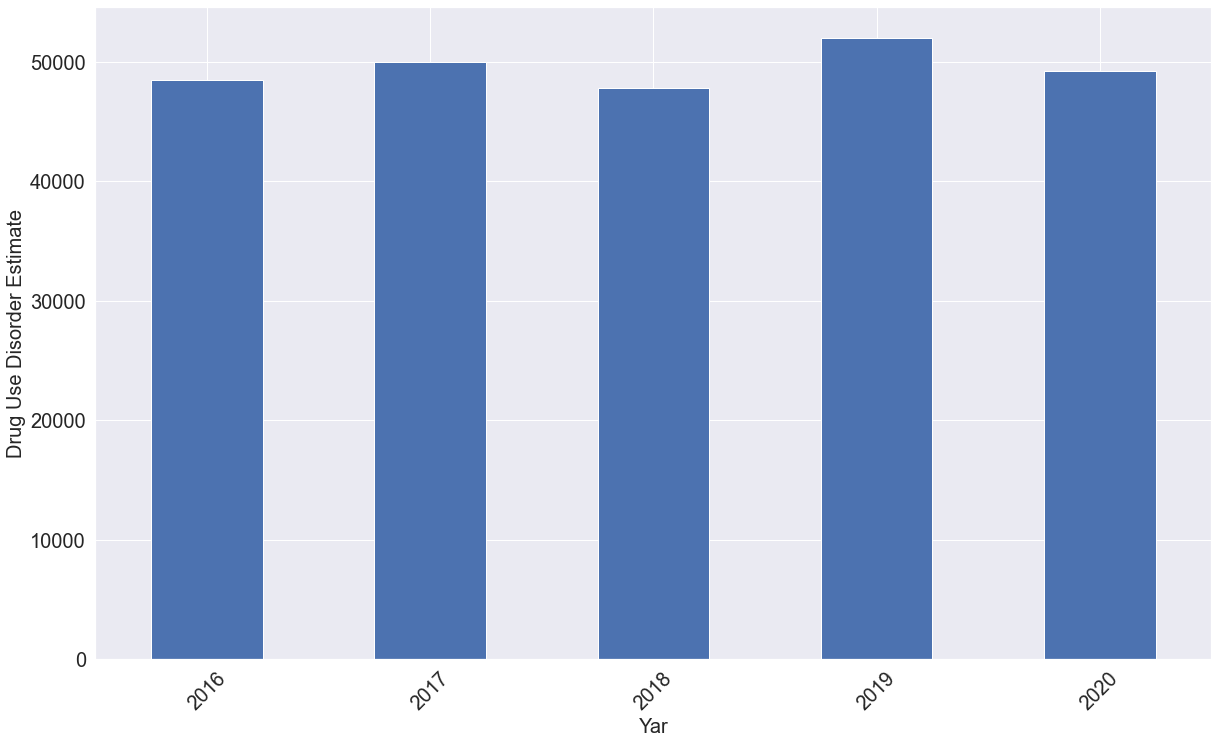

In [7]:
plt.rcParams["figure.figsize"] = (20,12)
sns.set(font_scale = 2)
df1.groupby(['Year'])['Drug Use Disorder Estimate'].mean().plot.bar(fontsize=16)
plt.xticks(rotation=45,fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = 'Yar', fontsize=20)
plt.ylabel(ylabel = 'Drug Use Disorder Estimate', fontsize=20)
plt.show()

In [8]:
### not a lot of change I expected 2020 to be highetr
### Age range does not allign with the other datasets,
##The other datasets have an older population